In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time

# 데이터 다운로드

In [ ]:
data_path = './data/train'
train_df = pd.read_csv(os.path.join(data_path, 'train_ratings.csv')) # 전체 학습 데이터
year_data = pd.read_csv(os.path.join(data_path, 'years.tsv'), sep='\t')
genre_data = pd.read_csv(os.path.join(data_path, 'genres.tsv'), sep='\t')

# 영화의 첫 평가시기에 대한 분석
- 앞선 분석에선 유저가 처음 평가를 내린 시기에 대한 분석을 했습니다. 분석을 통해 무비렌즈 론칭 초반에 평점 매겨진 영화들이 특정 시기에 새로 유입된 유저들에 의해 재평가되는 경우가 있음을 확인했습니다. 
- 그래서 이번엔 시기별로 **처음 평가매겨지는 영화의 수**가 어떻게 달라지는지 분석해보고자합니다.

In [ ]:
# 영화평점이 맨처음 기록된 시기의 데이터만 추출
train_df= train_df.sort_values(['item','time'])
train_df['time']= train_df['time'].apply(time_changer)
time_df= train_df.drop_duplicates('item', keep='first')

Text(0, 3824, '2005-04\n3824')

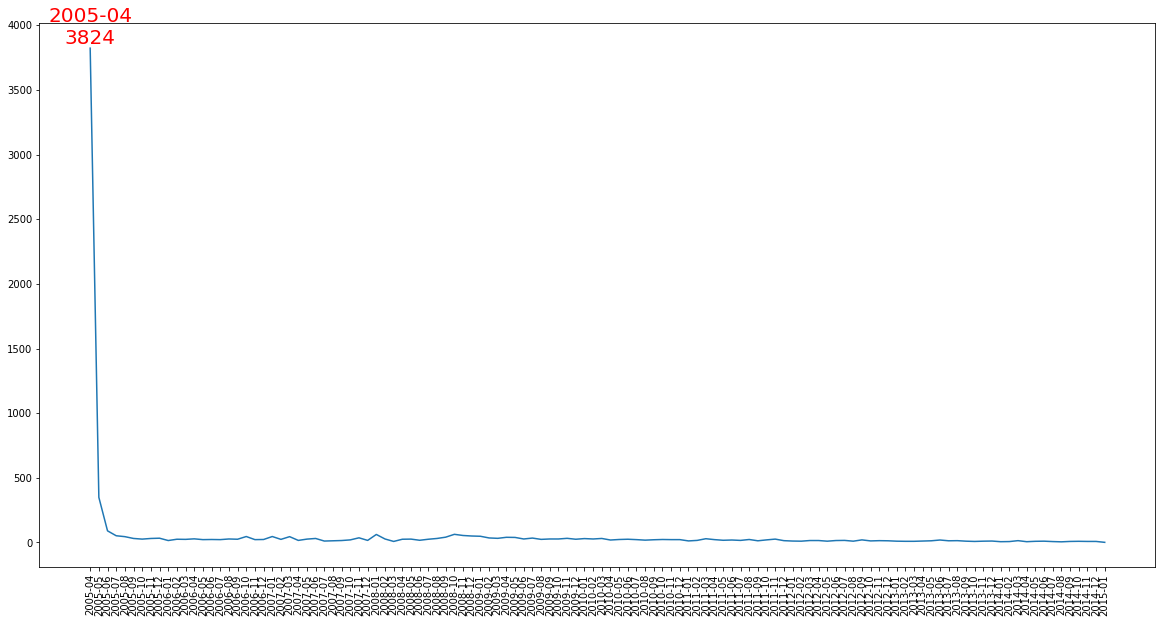

In [ ]:
plt.figure(figsize=(20,10))
temp=time_df.groupby('time')['item'].count()
plt.xticks(rotation='vertical')
plt.plot(temp)

# 최대값 표시
plt.text(temp.argmax() ,max(temp),
        temp.index[temp.argmax()] + '\n' + str(temp[temp.argmax()]),
         color='r',
         horizontalalignment='center',
         verticalalignment='bottom',
         fontsize= 20
         )


In [ ]:
print(temp.values)
print(sum(temp.values))

[3824  349   90   52   45   31   26   31   33   15   25   24   28   22
   23   22   27   25   46   22   23   46   24   45   16   26   31   11
   13   15   20   36   16   62   27    8   25   26   17   25   31   41
   63   54   50   48   35   32   40   39   27   34   24   27   27   32
   25   30   27   31   19   23   25   22   18   21   23   22   22   12
   16   29   22   17   19   16   23   13   20   26   14   11   10   15
   15   10   15   16   10   20   12   14   13   10    9    9   11   13
   19   13   14   10    8   10   11    6    7   14    6    9   10    7
    5    8    9    8    8    1]
6807


In [ ]:
3824/6807

0.5617746437490818

- 영화 중 56%가 론칭 첫 달에 평가가 이뤄지고 있습니다.

## 첫달 유저들의 평가이력
유저들은 론칭 첫 달에 어떤 영화에 관심을 갖고 평점을 매겼을까?

In [ ]:
first= train_df[train_df.time==min(train_df.time)]
print('첫달 평가된 영화 수: ',first.item.nunique())
print('첫달 평가한 유저 수: ',first.user.nunique())
first


첫달 평가된 영화 수:  3824
첫달 평가한 유저 수:  1257


,user,item,time
3378,132,471,2005-04
3379,132,2657,2005-04
3380,132,4034,2005-04
3381,132,345,2005-04
3382,132,2321,2005-04
...,...,...,...
5144821,138259,8366,2005-04
5144822,138259,3275,2005-04
5149598,138397,32596,2005-04
5149599,138397,31255,2005-04


In [ ]:
temp= pd.merge(first, genre_data, on='item',how='left')

In [ ]:
temp.groupby('genre')['user'].count().sort_values(ascending=False)

genre
Drama          24531
Comedy         19480
Action         13727
Thriller       13118
Adventure      11292
Romance         9545
Crime           9505
Sci-Fi          7261
Fantasy         5595
Mystery         4604
Children        3939
Horror          3573
Animation       3196
War             3030
Musical         2470
Western         1169
Documentary      968
Film-Noir        780
Name: user, dtype: int64

- 전체 유저의 장르 선호도(Drama > comedy > Action > Thriller > Adventure > Crime > Romance > Scifi..)와 조금씩 다른 부분은 존재하지만 거의 유사한 장르를 선호하고 있음을 알 수 있었습니다.